# Sampling in Python

## 📊 Simple sampling with pandas
Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Our first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyter_datatables import init_datatables_mode

In [5]:
# Read in the spotify data 
spotify_population = pd.read_feather('spotify_2000_2020.feather')

# Display the first few rows
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [6]:
# Display the row and column count
spotify_population.shape

(41656, 20)

In [7]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
spotify_sample.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
29729,0.000576,['Nine Inch Nails'],0.700,263093.0,4.384883,0.807,1.0,0m1DJ5Jkv3kdnGrcZsJFmC,0.004880,9.0,0.0996,-5.711,0.0,Only,50.0,2005-01-01,0.0290,112.150,0.963,2005.0
12516,0.105000,"['RMR', 'Future', 'Lil Baby']",0.885,192794.0,3.213233,0.525,1.0,2Phy6PupYrV7yn1cjV8kTL,0.000124,1.0,0.1320,-5.087,1.0,DEALER (feat. Future & Lil Baby),65.0,2020-05-07,0.0750,119.975,0.058,2020.0
251,0.000022,['Stone Sour'],0.265,193533.0,3.225550,0.957,1.0,2hX2v0U5lKSlxVxnesLEak,0.029100,11.0,0.1050,-3.415,1.0,Get Inside,47.0,2002-08-19,0.0995,151.610,0.396,2002.0
21070,0.000671,['Chevelle'],0.509,238400.0,3.973333,0.843,0.0,1gyee1JuFFiP476LQpRMYU,0.000803,1.0,0.3480,-3.318,0.0,The Red,69.0,2002,0.0488,140.055,0.332,2002.0
21450,0.206000,['50 Cent'],0.925,214227.0,3.570450,0.659,1.0,69bHJ9qs5FrUJbKP8xU8uZ,0.000079,3.0,0.2790,-4.763,1.0,Disco Inferno,69.0,2005-03-03,0.2310,97.018,0.710,2005.0


In [8]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8859160999999998


Notice that the mean song duration in the sample is similar, but not identical to the mean song duration in the whole population.

## Simple sampling and calculating with NumPy
You can also use `numpy` to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the `loudness` property of each song.

In [11]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Display the sample
loudness_samp.head()

19175   -7.568
27802   -3.540
6280    -8.070
29764   -6.448
24051   -9.533
Name: loudness, dtype: float64

In [12]:
# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.375689999999999


Again, notice that the calculated value (the mean) is close but not identical in each case.

## Are findings from the sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. ***Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population***.

The Spotify dataset contains an `acousticness` column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the `acousticness` distribution of the total population of songs with a sample of those songs.

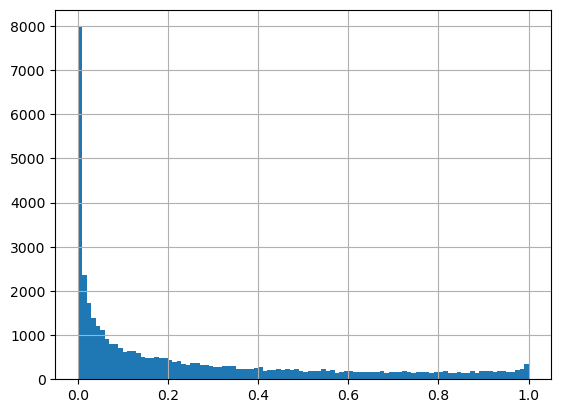

In [15]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))

plt.show()

In [16]:
# Read in the sms dataset
spotify_mysterious_sample = pd.read_csv('spotify_mysterious_sample.csv')

# Display the first few rows
spotify_mysterious_sample.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.972,['David Bauer'],0.567,313293.0,5.221550,0.22700,0.0,0w0D8H1ubRerCXHWYJkinO,0.60100,10.0,0.1100,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.988,"['The Cathedral Singers', 'Lorelei McDermott',...",0.233,248600.0,4.143333,0.12200,0.0,4IyK8htJJzbRjPihpMouWu,0.00354,10.0,0.0916,-19.528,1.0,"Ave Maria, Op. 52 No. 6, D. 839 (Arr. for Sopr...",52.0,2000-01-01,0.0333,90.593,0.0991,2000.0
2,0.958,"['Cliff Edwards', 'Disney Studio Chorus']",0.181,195120.0,3.252000,0.27000,0.0,0JIPxQiFYgnPfQDuAZTnHk,0.02030,9.0,0.3520,-13.616,1.0,"When You Wish Upon a Star - From ""Pinocchio""/S...",44.0,2001-01-01,0.0353,92.843,0.1140,2001.0
3,0.971,['John Williams'],0.153,226333.0,3.772217,0.00905,0.0,0pyKuk3bYFSzPIysym8ioN,0.60700,0.0,0.1070,-30.099,1.0,Hogwarts Forever! and the Moving Stairs,48.0,2001-10-30,0.0372,164.191,0.0730,2001.0
4,0.990,['Yiruma'],0.282,277133.0,4.618883,0.15200,0.0,5DLA620cB8o3YIXujemlay,0.90500,2.0,0.0676,-20.094,1.0,Passing By,49.0,2001-11-27,0.0349,84.109,0.0510,2001.0


In [17]:
spotify_mysterious_sample.shape

(1107, 20)

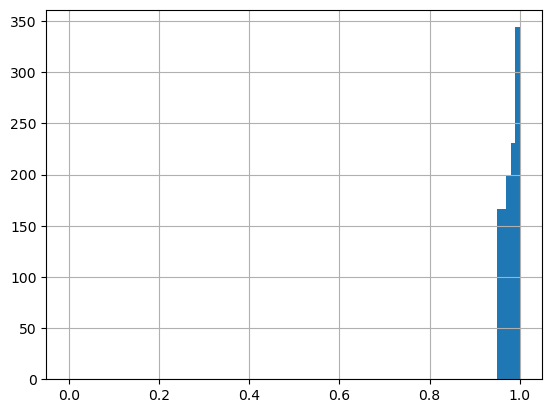

In [18]:
# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

Compare the two histograms you drew. Are the acousticness values in the sample generalizable to the general population?

The acousticness values in the sample are all greater than `0.95`, whereas they range from `0` to `1` in the whole population.

## Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the `duration_minutes` column of the Spotify dataset, which contains the length of the song in minutes.

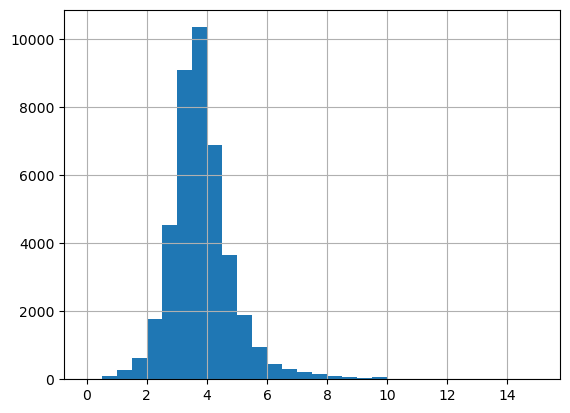

In [21]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5 ))
plt.show()

In [22]:
# Read in the sms2 dataset
spotify_mysterious_sample2 = pd.read_csv('spotify_mysterious_sample2.csv')

# Display the dataset
spotify_mysterious_sample2.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.000402,"['Lil Wayne', 'Drake']",0.364,305840.0,5.097333,0.841,1.0,5eEj1vkMIqtmvaTk7cS4UC,0.000000,8.0,0.2420,-4.831,1.0,She Will,51.0,2011-01-01,0.1190,100.140,0.0837,2011.0
1,0.310000,['blackbear'],0.758,180000.0,3.000000,0.427,1.0,0Cyui3k9S61bue3uMkBD9S,0.000000,10.0,0.1150,-9.835,0.0,Girls Like U,56.0,2016-06-17,0.1130,139.911,0.4890,2016.0
2,0.000984,['Lacuna Coil'],0.503,245573.0,4.092883,0.667,0.0,71KtwiEpzcn9WxwlaS7ZJY,0.027000,11.0,0.2290,-6.831,0.0,Enjoy the Silence - cover version,55.0,2006,0.0285,113.018,0.1010,2006.0
3,0.334000,['The Beach Boys'],0.414,215827.0,3.597117,0.424,0.0,7tf64lNC31lWlTsih0nfZf,0.000005,10.0,0.1310,-9.497,1.0,Good Vibrations,46.0,2012-01-01,0.0399,132.430,0.3250,2012.0
4,0.001700,['In This Moment'],0.426,197627.0,3.293783,0.975,0.0,4Mpm64J9yqluKaOssgVQ9P,0.000000,0.0,0.0891,-1.892,1.0,Call Me,50.0,2009-04-10,0.0950,142.998,0.2730,2009.0


In [23]:
spotify_mysterious_sample2.shape

(50, 20)

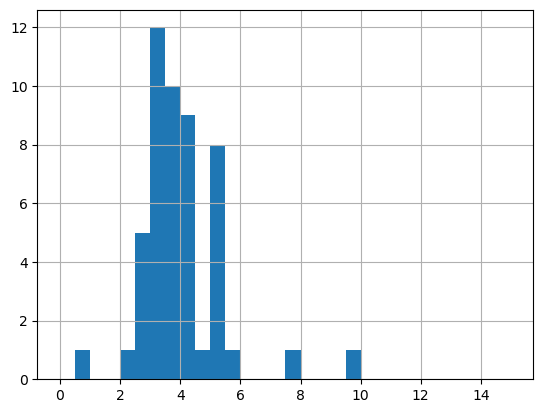

In [24]:
# Update the histogram to use spotify_mysterious_sample2
spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

Compare the two histograms you drew. Are the duration values in the sample generalizable to the general population?

Yes. The sample selected is likely a random sample of all songs in the population.

The duration values in the sample show a similar distribution to those in the whole population, so the results are generalizable.

## Generating random numbers
You've used `.sample()` to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the `normal distribution`.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.

In [27]:
# Generate 5000 random numbers from a uniform distribution ranging from -3 to 3
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print the array of generated uniform random numbers
print(uniforms)

[-0.26229545  1.09410893 -2.98739731 ... -1.4148736  -0.41667879
  1.16612088]


In [28]:
len(uniforms)

5000

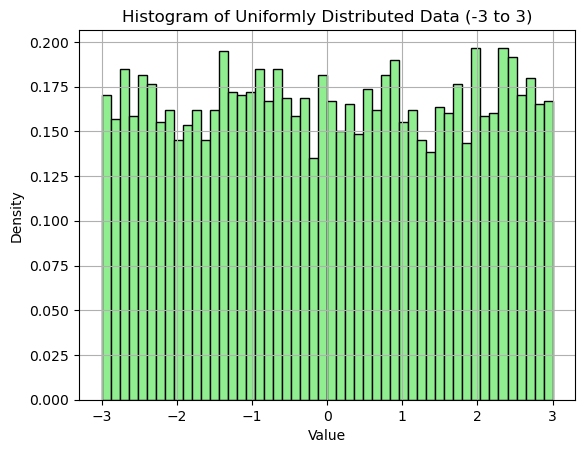

In [29]:
# Plot a histogram to visualize the distribution
plt.hist(uniforms, bins=50, color='lightgreen', edgecolor='black', density=True)
plt.title('Histogram of Uniformly Distributed Data (-3 to 3)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [30]:
# Generate 5000 random numbers from a normal (Gaussian) distribution
# The distribution has a mean (loc) of 5 and a standard deviation (scale) of 2
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print the array of generated normal random numbers
print(normals)

[ 5.3331899   7.16145171  2.14037793 ... 10.1807732   8.92113789
  4.59077218]


In [31]:
len(normals)

5000

Most of your values will cluster around 5, with fewer values further away, but still within a range of about

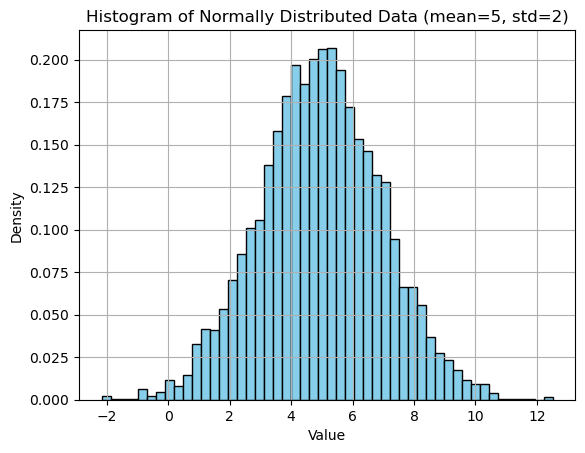

In [33]:
plt.hist(normals, bins=50, color='skyblue', edgecolor='black', density=True)
plt.title('Histogram of Normally Distributed Data (mean=5, std=2)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

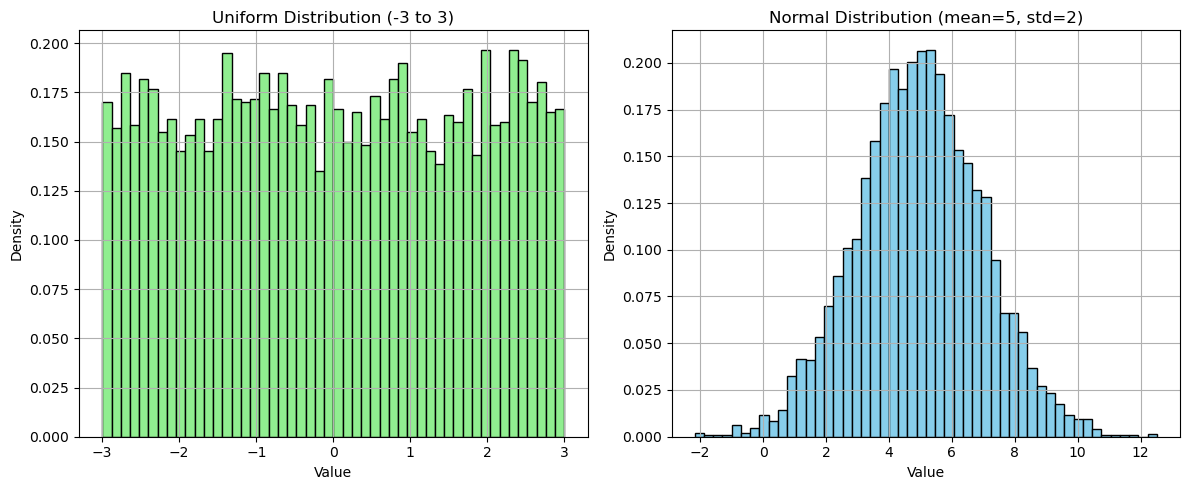

In [34]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the uniform distribution
axes[0].hist(uniforms, bins=50, color='lightgreen', edgecolor='black', density=True)
axes[0].set_title('Uniform Distribution (-3 to 3)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].grid(True)

# Plot the normal distribution
axes[1].hist(normals, bins=50, color='skyblue', edgecolor='black', density=True)
axes[1].set_title('Normal Distribution (mean=5, std=2)')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

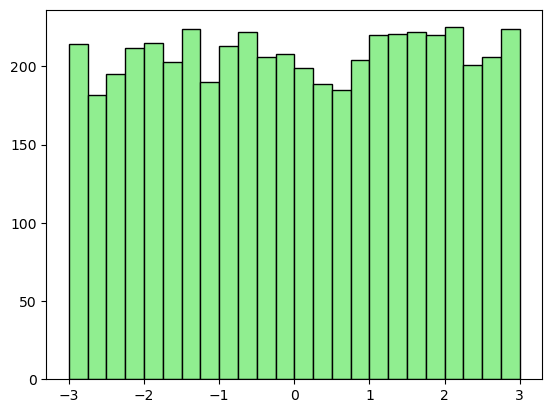

In [35]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
# Define bin edges from -3 to 3.25 with a bin width of 0.25
# first edge = -3.0
# second edge = -3.0+0.25 = -2.75
# 3rd edge = -2.75+0.25 = -2.50 and so on
# The first bar corresponds to the range between -3.0 and -2.75.
# The second bar corresponds to the range between -2.75 and -2.5, and so on.
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25), color='lightgreen', edgecolor='black')
plt.show()

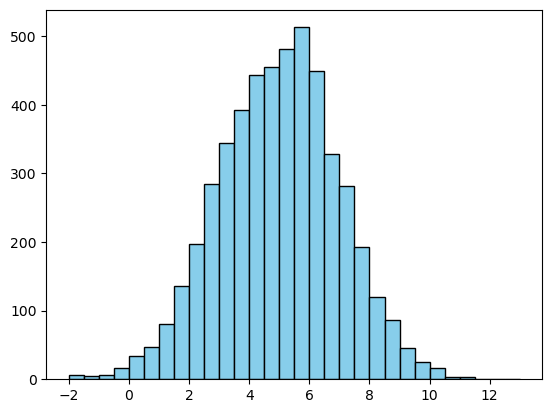

In [36]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, np.arange(-2, 13.5, 0.5), color='skyblue', edgecolor='black')
plt.show()

Notice how the histograms almost take the flat and bell curve shapes of the uniform and normal distributions, but there is a bit of random noise.

## Understanding random seeds
While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward conversations with your boss when your script for calculating the sales forecast gives different answers each time.

Setting the seed for `numpy's` random number generator helps avoid such problems by making the random number generation reproducible.

In [39]:
# In the first case, the seed is set once, and the generator progresses through its state for both x and y independently.
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)

In [40]:
print(x)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [41]:
print(y)

[ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


In [42]:
# In the second case, the seed is reset to the same value before generating y, 
# so both x and y are drawn from the same sequence of random numbers.
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)

In [43]:
print(x)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [44]:
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [45]:
# The random numbers in x and y are different because the seed 
# for the random number generator was changed between generating x and y.
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)

In [46]:
print(x)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [47]:
print(y)

[-0.6681285  -0.49820952  0.61857582  0.56869225  1.35050948]


## Simple random sampling
The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

In [49]:
# import the attrition data
attrition_pop = pd.read_feather('attrition.feather')

# Display the first few row
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [50]:
attrition_pop.shape

(1470, 31)

In [51]:
# Sample 70 rows using simple random sampling and set the seed
# random_state=18900217: ensures it will produce the same results every time the code is run with this seed and dataset.
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
attrition_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3


Notice how the indexes in the sample aren't always in increasing order. They are just random.

## 📊 Systematic sampling
One sampling method that avoids randomness is called ***systematic sampling***. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows `0`, `200`, `400`, `600`, and `800`.

In [54]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Print pop_size
print(pop_size)

1470


In [55]:
# Calculate the interval
interval = pop_size // sample_size

# Print interval
print(interval)

21


In [56]:
# Systematically sample 70 rows
# Systematically sample every 'interval'-th row from the population
# This gives you approximately 70 evenly spaced rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
attrition_sys_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0


It selects rows at regular intervals (e.g., every 21st row if interval = 21).

This is a simple and efficient way to get a roughly evenly distributed sample from a sorted or randomized population.

Unlike random sampling, it's not truly random unless you first shuffle the data.

## Is systematic sampling OK?
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

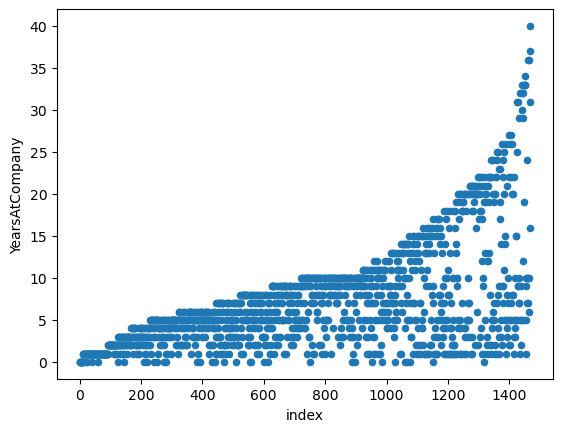

In [59]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

In [60]:
attrition_pop_id.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,...,Excellent,High,0,0,2,Better,0,0,0,0
3,3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


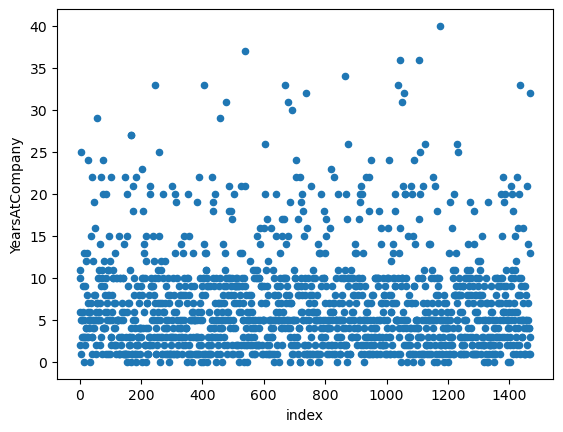

In [61]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

In [62]:
attrition_shuffled.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,30,0.0,Travel_Rarely,1339,Sales,5,Bachelor,Life_Sciences,Medium,...,Excellent,High,1,12,2,Better,10,9,7,4
1,1,21,0.0,Travel_Rarely,984,Research_Development,1,Below_College,Technical_Degree,Very_High,...,Excellent,High,0,2,6,Best,2,2,2,2
2,2,35,1.0,Travel_Frequently,880,Sales,12,Master,Other,Very_High,...,Outstanding,Low,0,13,2,Best,11,9,6,7
3,3,37,0.0,Travel_Rarely,446,Research_Development,1,Master,Life_Sciences,Medium,...,Excellent,Medium,1,8,2,Good,6,5,4,3
4,4,20,1.0,Travel_Rarely,1097,Research_Development,11,Bachelor,Medical,Very_High,...,Excellent,Low,0,1,2,Better,1,0,0,0


In [63]:
attrition_shuffled.shape

(1470, 32)

Systematic sampling has problems when the data are sorted or contain a pattern. Shuffling the rows makes it equivalent to simple random sampling.

## 📊 Proportional stratified sampling
If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. ***Proportional stratified*** sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

**What it does**:
* Takes 40% of each group (based on the 'Education' column).
* If one group has 100 people, you'll get 40 from that group.
* If another has 50 people, you'll get 20.

**Sample size per group**:
Proportional to group size.

✅**Best for**:
* Keeping the same proportions as the population.
* Making your sample represent the real-world distribution of groups.

In [66]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64


In [67]:
# Proportional stratified sampling for 40% of each Education group
# attrition_pop.groupby('Education', observed=False)
# → This splits the dataset (attrition_pop) into separate groups based on the 'Education' column.
# .sample(frac=0.4, random_state=2022)
# → From each group, it randomly selects 40% of the rows.
# The random_state=2022 ensures you get the same sample every time you run it.
attrition_strat = attrition_pop.groupby('Education', observed=False).sample(frac=0.4, random_state=2022)


# Print the sample
attrition_strat.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4


In [68]:
attrition_strat.shape

(588, 31)

In [69]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64


> By grouping then sampling, the size of each group in the sample is representative of the size of the sample in the population.

## 📊 Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

**What it does**:
* Takes exactly 30 people from each group, regardless of how big the group is.
* Even if one group has 300 and another has only 40, both will contribute 30.

**Sample size per group**:
Same for all groups (e.g., 30 each).

**✅Best for**:
* Comparing groups equally.
* Avoiding dominance of large groups in analysis.

In [72]:
# Get 30 employees from each Education group
# A balanced sample: 30 employees from each education level.
# Total sample size = 30 × number of education groups.
# Useful when comparing groups equally — even if some groups are small in the full dataset.
attrition_eq = attrition_pop.groupby('Education', observed=False).sample(n=30, random_state=2022)


# Print the sample
attrition_eq.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4


In [73]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64


> If you want each subgroup to have equal weight in your analysis, then equal counts stratified sampling is the appropriate technique.

## 📊 Weighted sampling
Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

### 🧠 Explanation

1. **`attrition_pop.sample(n=400, weights="YearsAtCompany")`**

   * Randomly selects **400 employees** from the `attrition_pop` dataset.
   * Uses the **`YearsAtCompany`** column as **weights** instead of equal chance selection.

2. **How the weights work:**

   * Employees with **more years** at the company are **more likely** to be chosen.
   * Employees with **fewer years** are **less likely** to be picked.

3. **`attrition_weight`**

   * Stores the resulting **weighted random sample**.

4. **`print(attrition_weight)`**

   * Displays the sampled data.

---

### 📝 What is *Weighted Sampling*?

Weighted sampling adjusts the chance of selection using a numeric column (like `YearsAtCompany`).

This is useful when:

* You want to **over-represent** employees with longer tenure.
* You want to **simulate real-world influence** or **prioritize** certain values.

---

### ⚠️ Important Notes

* The weights must be **non-negative** (no negatives or NaNs).
* They **don’t need to sum to 1** — Python handles normalization automatically.


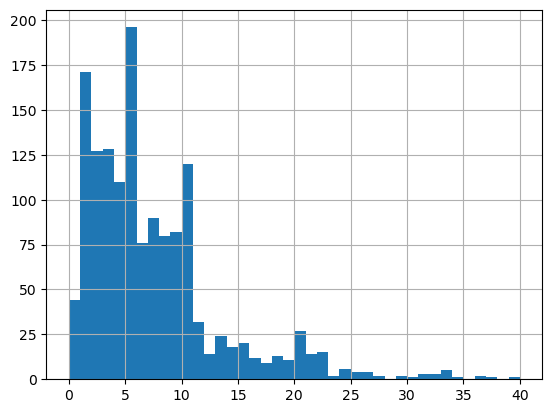

In [76]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

In [77]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Print the sample
attrition_weight.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
49,20,1.0,Travel_Rarely,129,Research_Development,4,Bachelor,Technical_Degree,Low,Male,...,Excellent,Medium,0,1,2,Better,1,0,0,0
1304,41,0.0,Travel_Rarely,334,Sales,2,Master,Life_Sciences,Very_High,Male,...,Excellent,Medium,0,22,2,Better,22,10,0,4
1019,37,0.0,Travel_Rarely,1319,Research_Development,6,Bachelor,Medical,High,Male,...,Excellent,Low,2,13,2,Better,7,7,6,7
323,36,0.0,Travel_Frequently,1195,Research_Development,11,Bachelor,Life_Sciences,Medium,Male,...,Excellent,High,0,6,3,Better,6,5,0,3
932,31,0.0,Travel_Rarely,1232,Research_Development,7,Master,Medical,High,Female,...,Excellent,High,0,11,2,Good,11,9,4,10


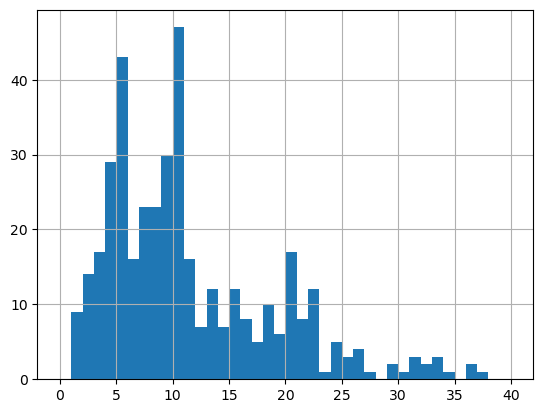

In [78]:
# Ensure you are using the correct DataFrame and column
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

> The weighted sample mean is around 11, which is higher than the population mean of around 7. The fact that the two numbers are different means that the weighted simple random sample is biased.

## 📊 Cluster sampling
Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the `JobRole` column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

In [81]:
import random
random.seed(19790801)

# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Display the JobRoles
job_roles_pop

['Research_Scientist',
 'Sales_Representative',
 'Laboratory_Technician',
 'Human_Resources',
 'Sales_Executive',
 'Manufacturing_Director',
 'Healthcare_Representative',
 'Research_Director',
 'Manager']

In [82]:
# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Print the result
print(job_roles_samp)

['Research_Director', 'Research_Scientist', 'Human_Resources', 'Manager']


In [83]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
attrition_filtered.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
5,27,0.0,Non-Travel,443,Research_Development,3,Bachelor,Medical,Very_High,Male,...,Excellent,High,3,0,6,Good,0,0,0,0
6,18,0.0,Non-Travel,287,Research_Development,5,College,Life_Sciences,Medium,Male,...,Excellent,Very_High,0,0,2,Better,0,0,0,0
10,18,0.0,Non-Travel,1431,Research_Development,14,Bachelor,Medical,Medium,Female,...,Excellent,High,0,0,4,Bad,0,0,0,0
17,31,0.0,Travel_Rarely,1082,Research_Development,1,Master,Medical,High,Male,...,Excellent,Medium,0,1,4,Better,1,1,1,0


In [84]:
attrition_filtered['JobRole'].cat.categories

Index(['Healthcare_Representative', 'Human_Resources', 'Laboratory_Technician',
       'Manager', 'Manufacturing_Director', 'Research_Director',
       'Research_Scientist', 'Sales_Executive', 'Sales_Representative'],
      dtype='object')

Other JobRole are included after sampling just 4

In [86]:
# Remove categories with no rows
attrition_filtered = attrition_filtered.copy()
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

In [87]:
attrition_filtered['JobRole'].cat.categories

Index(['Human_Resources', 'Manager', 'Research_Director',
       'Research_Scientist'],
      dtype='object')

Now only the filtered JobRole are included

In [89]:
# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole',  observed=False).sample(10, random_state=2022)

# Print the sample
attrition_clust.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1348,44,1.0,Travel_Rarely,1376,Human_Resources,1,College,Medical,Medium,Male,...,Excellent,Very_High,1,24,1,Better,20,6,3,6
886,41,0.0,Non-Travel,552,Human_Resources,4,Bachelor,Human_Resources,High,Male,...,Excellent,Medium,1,10,4,Better,3,2,1,2
983,39,0.0,Travel_Rarely,141,Human_Resources,3,Bachelor,Human_Resources,High,Female,...,Excellent,High,1,12,3,Bad,8,3,3,6
88,27,1.0,Travel_Frequently,1337,Human_Resources,22,Bachelor,Human_Resources,Low,Female,...,Excellent,Low,0,1,2,Better,1,0,0,0
189,34,0.0,Travel_Rarely,829,Human_Resources,3,College,Human_Resources,High,Male,...,Excellent,High,1,4,1,Bad,3,2,0,2


> The two-stage sampling technique gives you control over sampling both between subgroups and within subgroups.

## 3 kinds of sampling
You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.

You'll use the `RelationshipSatisfaction` column of the `attrition_pop` dataset, which categorizes the employee's relationship with the company. It has four levels: `Low`, `Medium`, `High`, and `Very_High`.

In [92]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

In [93]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction', observed=False).sample(frac=0.25, random_state=2022)

In [94]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())
satisfaction_unique

['Very_High', 'High', 'Low', 'Medium']

In [95]:
# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)
satisfaction_samp

['High', 'Low']

In [96]:
# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]

attrition_clust_prep['RelationshipSatisfaction'].cat.categories

Index(['Low', 'Medium', 'High', 'Very_High'], dtype='object')

In [97]:
attrition_clust_prep = attrition_clust_prep.copy()

attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

attrition_clust_prep['RelationshipSatisfaction'] .cat.categories

Index(['Low', 'High'], dtype='object')

In [98]:
# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction",  observed=False)\
.sample(n=len(attrition_pop) // 4, random_state=2022, replace=True)

In [99]:
attrition_clust.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1113,36,0.0,Non-Travel,301,Sales,15,Master,Marketing,Very_High,Male,...,Outstanding,Low,1,15,4,Good,15,12,11,11
885,32,0.0,Travel_Frequently,585,Research_Development,10,Bachelor,Life_Sciences,Low,Male,...,Excellent,Low,1,10,3,Good,5,2,1,3
592,33,0.0,Travel_Frequently,1111,Sales,5,Below_College,Life_Sciences,Medium,Male,...,Excellent,Low,0,8,2,Best,5,4,1,2
914,40,0.0,Travel_Frequently,692,Research_Development,11,Bachelor,Technical_Degree,Very_High,Female,...,Excellent,Low,1,10,2,Best,10,9,9,4
1234,40,0.0,Travel_Frequently,1395,Research_Development,26,Bachelor,Medical,Medium,Female,...,Excellent,Low,1,20,2,Better,20,7,2,13


## Comparing point estimates
Now that you have three types of sample (***simple***, ***stratified***, and ***cluster***), you can compare point estimates from each sample to the population parameter. That is, you can calculate the same summary statistic on each sample and see how it compares to the summary statistic for the population.

Here, we'll look at how satisfaction with the company affects whether or not the employee leaves the company. That is, you'll calculate the proportion of employees who left the company (they have an `Attrition` value of `1`) for each value of `RelationshipSatisfaction`.

In [101]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction', observed=False )['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [102]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction', observed=False )['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [103]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat =  attrition_strat.groupby('RelationshipSatisfaction', observed=False )['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64


In [104]:
# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction', observed=False )['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low     0.204360
High    0.155313
Name: Attrition, dtype: float64


>The numbers are all fairly similar, with the notable exception that cluster sampling only gives results for the clusters included in the sample.

## Calculating relative errors
The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is ***relative error***. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

`relative error = abs(pop - sample)/pop * 100`

In [107]:
# Calculate the mean employee attrition in the pop
mean_attrition_pop = attrition_pop['Attrition'].mean()

mean_attrition_pop

0.16122448979591836

In [108]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

mean_attrition_srs50

0.06

In [109]:
# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50)/mean_attrition_pop

# Print rel_error_pct50
rel_error_pct50

62.78481012658227

In [110]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100)/mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


>As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

## Replicating samples
When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

In [113]:
# Create an empty list to store the means of randomly drawn samples
mean_attritions = []

# Repeat the process 500 times to simulate the sampling distribution of the mean
for i in range(500):
    # Randomly select 60 rows (without replacement by default) from the population DataFrame
    # Then, take the mean of the 'Attrition' column in that sample
    sample_mean = attrition_pop.sample(n=60)['Attrition'].mean()
    
    # Append the sample mean to the list
    mean_attritions.append(sample_mean)

# Display the first 5 sample means to check the result
print(mean_attritions[0:5])

[0.16666666666666666, 0.18333333333333332, 0.1, 0.15, 0.18333333333333332]


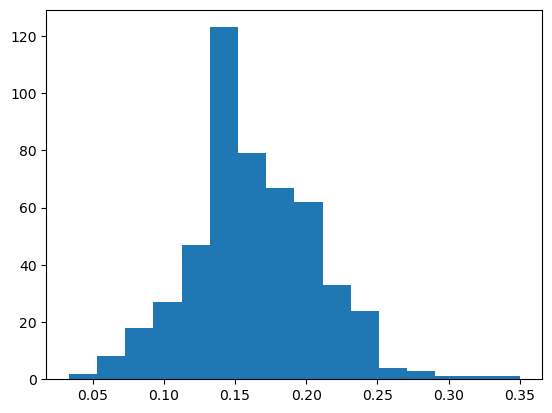

In [114]:
# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

>By generating the sample statistic many times with different samples, you can quantify the amount of variation in those statistics.

> As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

## Exact sampling distribution
To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

You're simulating every possible outcome of rolling 5 eight-sided dice — meaning you want to generate all combinations of one value from each die.

Each die can roll a number between 1 and 8, and you want to know all the ways the 5 dice can land at once.

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

# This function creates a DataFrame that contains all possible combinations
# of values from the input dictionary. Each key in the dictionary represents
# a variable (like a die), and the associated list represents possible values.
def expand_grid(data_dict):
    # Use itertools.product to compute the Cartesian product of the input lists.
    # This gives all possible ways of selecting one value from each list.
    # The * unpacks the lists so that itertools.product() sees them as separate arguments.
    rows = itertools.product(*data_dict.values())
    
    # Convert the list of tuples (rows) into a DataFrame, with the dictionary
    # keys as column names.
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Define the values for each of the five 8-sided dice.
# Each die can roll a value from 1 to 8.
dice_values = [1, 2, 3, 4, 5, 6, 7, 8]

# Create a dictionary representing five dice, each with values from 1 to 8.
# The keys will become column names in the final DataFrame.
dice_dict = {
    'die1': dice_values,
    'die2': dice_values,
    'die3': dice_values,
    'die4': dice_values,
    'die5': dice_values
}

# Generate all possible combinations of rolling five 8-sided dice.
# There will be 8^5 = 32,768 combinations.
dice = expand_grid(dice_dict)

# Display the first few rows to see the structure
#print(dice.head())

# Optional: Add a column that shows the total sum of all five dice for each combination
#dice['total'] = dice.sum(axis=1)

# Display the first few rows again to include the 'total' column
dice.head()

,die1,die2,die3,die4,die5
0,1,1,1,1,1
1,1,1,1,1,2
2,1,1,1,1,3
3,1,1,1,1,4
4,1,1,1,1,5


In [119]:
# Add a column of mean rolls and convert to a categorical
# dice['mean_roll'] = dice[['die1', 'die2', 'die3', 'die4', 'die5']].mean(axis=1)
dice['mean_roll'] = dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5 
                     
                    
# Convert the mean_roll column to a categorical type
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
dice.head()

,die1,die2,die3,die4,die5,mean_roll
0,1,1,1,1,1,1.0
1,1,1,1,1,2,1.2
2,1,1,1,1,3,1.4
3,1,1,1,1,4,1.6
4,1,1,1,1,5,1.8


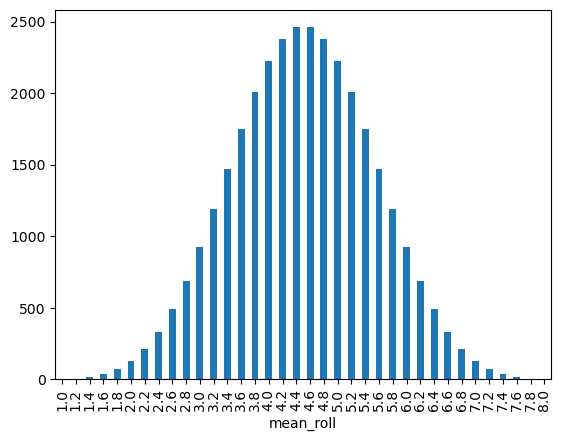

In [120]:
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")
plt.show()

>The exact sampling distribution shows all possible variations of the point estimate that you are interested in.

## Generating an approximate sampling distribution
Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is `8**5`, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

In [123]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)
print(five_rolls)

[6 4 4 6 5]


In [124]:
# Print the mean of five_rolls
print(five_rolls.mean())

5.0


In [125]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_mean = np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    sample_means_1000.append(sample_mean)
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[6.0, 3.2, 4.4, 4.0, 4.4, 5.0, 5.0, 3.8, 4.4, 5.2]


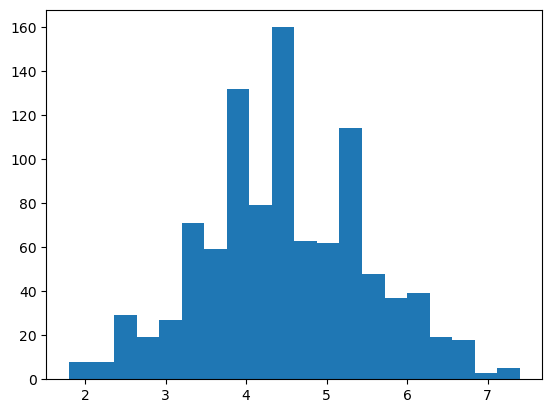

In [126]:
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

> Once your dataset gets sufficiently big, exact sampling distributions cannot be calculated, so an approximate sampling distribution must be used. Notice that the histogram is close to but not exactly the same as the shape of the bar graph from the previous exercise.

> The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

## Population & sampling distribution means
One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

In [197]:
# 5 sample distributions 
sampling_distribution_5 = []

for i in range(1000):
    att_sample = attrition_pop['Attrition'].sample(n=5).mean()
    sampling_distribution_5.append(att_sample)
    
sampling_distribution_5[0:5]

[0.0, 0.2, 0.4, 0.4, 0.0]

In [199]:
# 50 sample distributions 
sampling_distribution_50 = []

for i in range(1000):
    att_sample50 = attrition_pop['Attrition'].sample(n=50).mean()
    sampling_distribution_50.append(att_sample50)
    
sampling_distribution_50[0:5]

[0.1, 0.12, 0.2, 0.2, 0.22]

In [201]:
# 500 sample distributions 
sampling_distribution_500 = []

for i in range(1000):
    att_sample500 = attrition_pop['Attrition'].sample(n=500).mean()
    sampling_distribution_500.append(att_sample500)
    
sampling_distribution_500[0:5]

[0.174, 0.156, 0.148, 0.132, 0.184]

In [203]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.16760000000000003
0.16340000000000005
0.161334


In [208]:
# Population mean
attrition_pop['Attrition'].mean()

0.16122448979591836

Even for small sample sizes, the mean of the sampling distribution is a good approximation of the population mean.

## Population & sampling distribution variation
You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the `central limit theorem`, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

In [216]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.16786428571443784
0.050610289481501695
0.01298649656732304


In [218]:
# Population std
attrition_pop['Attrition'].std()

0.36786303197196485

>The amount of variation in the sampling distribution is related to the amount of variation in the population and the sample size. This is another consequence of the Central Limit Theorem.

> The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.